In [114]:
import hiplot as hip
import pandas as pd
import matplotlib.pyplot as plt
import uproot3 as uproot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import random
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import os
import sys
from scipy.optimize import curve_fit
from scipy.integrate import quad

import mplhep as hep
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use([hep.styles.ATLAS])
# mpl.rcParams['mathtext.fontset'] = 'stix'
# mpl.rcParams['font.family'] = 'STIXGeneral'

from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=17)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline


def hist1d(df,nbins,weights=None,**kwargs):
    if weights is None:
        out=np.histogram(df,bins=nbins)
    else:
        out=np.histogram(df,bins=nbins,weights=weights)
    hep.histplot(out,**kwargs)
    return out
    
def hist2d(dfx,dfy,nbins,weights=None,**kwargs):
    if weights is None:
        out=np.histogram2d(dfx,dfy,bins=nbins)
    else:
        out=np.histogram2d(dfx,dfy,bins=nbins,weights=weights)
    hep.hist2dplot(out,**kwargs)
    return out

In [388]:
sp2018=np.array([1.409,1.383,1.409,1.404,1.388,1.331,1.341,1.320,1.268,1.294,1.362])
sp2018_err=[0.084,0.083,0.073,0.068,0.073,0.062,0.063,0.058,0.047,0.073,0.131]
sp2017=np.array([1.414,1.430,1.398,1.378,1.372,1.367,1.336,1.341,1.341,1.268,1.304])
sp2017_err=[0.052,0.047,0.047,0.041,0.042,0.037,0.036,0.037,0.031,0.047,0.068]
fa2018=np.array([1.524,1.529,1.466,1.482,1.461,1.440,1.393,1.409,1.383,1.367,1.325])
fa2018_err=[0.052,0.052,0.047,0.047,0.037,0.032,0.037,0.036,0.031,0.047,0.053]


plt.errorboar()

In [329]:
cols=[
    "mismatchPairMass_13","mismatchPairMass_24","mismatchPairMass_23","mismatchPairMass_14",
    "Mpi0eta","weightASBS","weightBS","cosTheta_eta_gj","Mpi0","Meta","AccWeight","chiSq","Ebeam","mandelstam_t","mandelstam_tp","Mpi0p","Metap","omegaCut",
     "mandelstam_teta","mandelstam_tpi0","run","event","rfTime","phi_eta_lab","phi_pi0_lab","BeamAngle"
]

floc="/d/grid17/ln16/myDSelector/zDSelectedBkgndSamples_noOmegaCut/omega_pi0g/degALL_bkgndSample_mEllipse_8288_tLT1_treeFlat_DSelector.root"
treeName="tree_4g_flat"
tree=uproot.open(floc)[treeName]
df=tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)

In [175]:
cols=[
    "mismatchPairMass_13","mismatchPairMass_24","mismatchPairMass_23","mismatchPairMass_14",
    "Mpi0eta","weightASBS","weightBS","cosTheta_eta_gj","Mpi0","Meta","AccWeight","chiSq","Ebeam","mandelstam_t","mandelstam_tp","Mpi0p","Metap","omegaCut",
     "mandelstam_teta","mandelstam_tpi0","run","event","rfTime","phi_eta_lab","phi_pi0_lab","BeamAngle"
]

floc="/d/grid17/ln16/myDSelector/zDSelectedBkgndSamples_noOmegaCut/flat_etapi/degALL_bkgndSample_mEllipse_8288_tLT1_treeFlat_DSelector.root"
treeName="tree_4g_flat"
tree=uproot.open(floc)[treeName]
df_sig=tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)
# df_sig=df_sig.sample(len(df))

In [339]:
df_datas=[]
for run in ["2017","2018_1","2018_8"]:
    floc="/d/grid17/ln16/myDSelector/zDSelectedBkgndSamples_noOmegaCut/data_"+run+"/degALL_bkgndSample_mEllipse_8288_tLT1_treeFlat_DSelector.root"
    treeName="tree_4g_flat"
    tree=uproot.open(floc)[treeName]
    df_data=tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)
    df_datas.append(df_data)
df_data=pd.concat(df_datas)

In [340]:
df["noSelect"]=True
df_sig["noSelect"]=True
df_data["noSelect"]=True
df["noWeight"]=1
df_sig["noWeight"]=1
df_data["noWeight"]=1

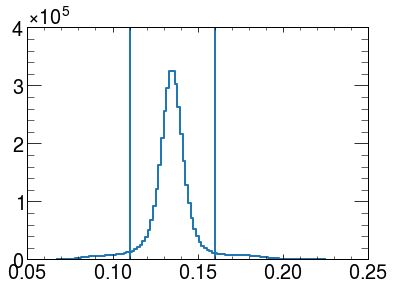

In [341]:
_=hist1d(df_sig["Mpi0"],100)
plt.axvline(0.11)
plt.axvline(0.16)

Text(0, 0.5, 'Entries / 0.007 GeV')

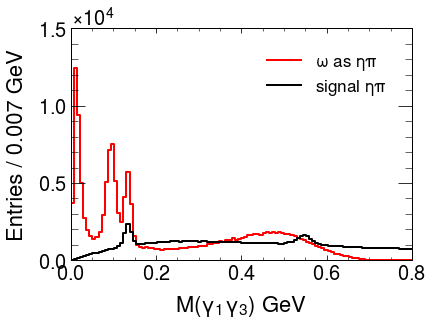

In [342]:
# 1D distributions 13,14,23,24 all look the same
edges=hist1d(df["mismatchPairMass_13"],200,color='red',label=r"$\omega$ as $\eta\pi$")[1]
norm=[len(df)/len(df_sig)]*len(df_sig)
hist1d(df_sig["mismatchPairMass_13"],edges,weights=norm,color='black',label=r"signal $\eta\pi$")
plt.legend()
plt.xlim(0,0.8)
plt.xlabel(r"$M(\gamma_1\gamma_3)$ GeV")
plt.ylabel(f"Entries / {edges[1]-edges[0]:0.3f} GeV")

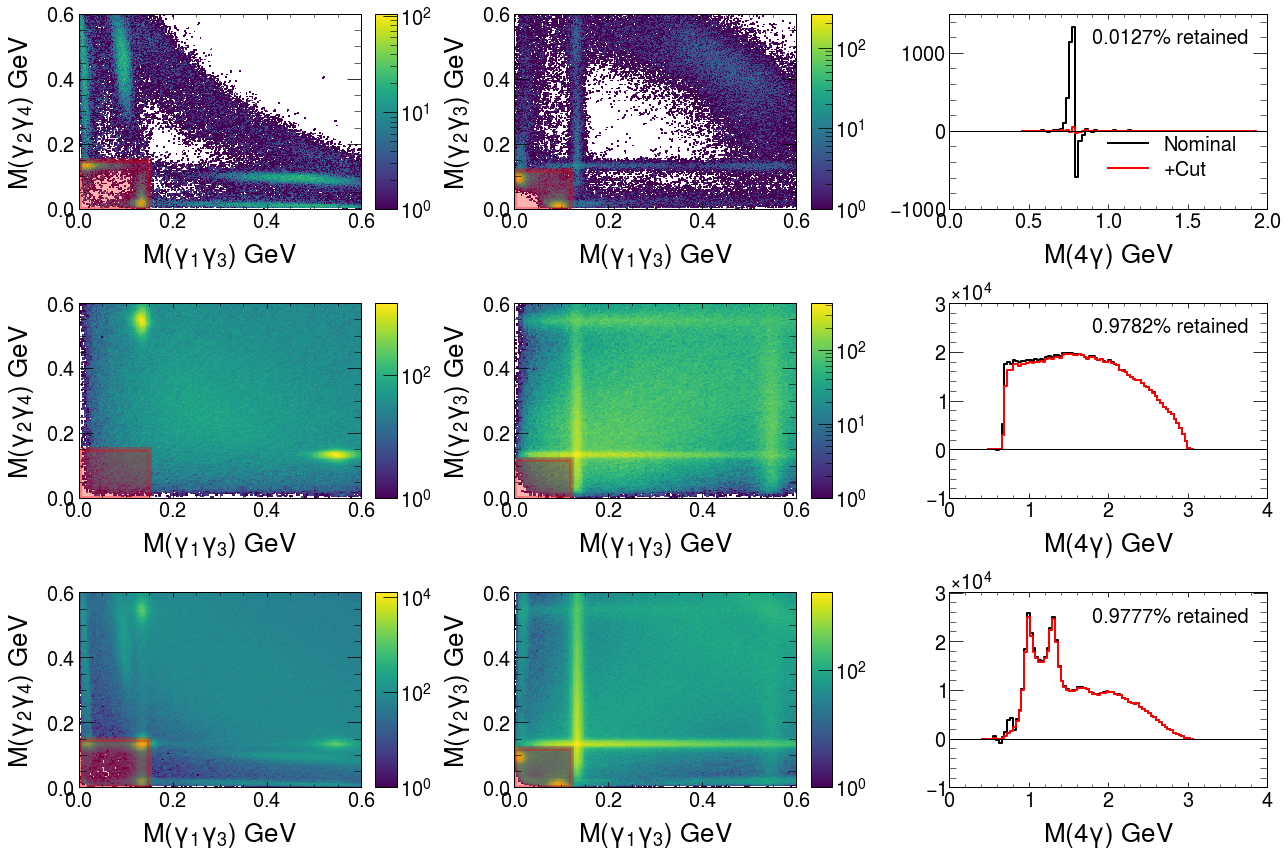

In [343]:
# 13vs24 looks exactly like 23vs14
##################################
fig,axes=plt.subplots(3,3,figsize=(18,12))#,sharex=True,sharey=True)
axes=axes.flatten()

#l,u=0.115,0.145
l,u=0.12,0.15
def applyCondition(d):
    condition=\
        ((d["mismatchPairMass_13"]<u)&(d["mismatchPairMass_24"]<u))|\
        ((d["mismatchPairMass_14"]<u)&(d["mismatchPairMass_23"]<u))|\
        ((d["mismatchPairMass_13"]<l)&(d["mismatchPairMass_23"]<l))|\
        ((d["mismatchPairMass_14"]<l)&(d["mismatchPairMass_24"]<l))
#     condition=\
#         ((df["mismatchPairMass_13"]<u)&(df["mismatchPairMass_13"]>l))|\
#         ((df["mismatchPairMass_23"]<u)&(df["mismatchPairMass_23"]>l))|\
#         ((df["mismatchPairMass_14"]<u)&(df["mismatchPairMass_14"]>l))|\
#         ((df["mismatchPairMass_24"]<u)&(df["mismatchPairMass_24"]>l))
#         ((df["Mpi0"]<u)&(df["Mpi0"]>l))|\
#         ((df["Meta"]<u)&(df["Meta"]>l))
    
    # Above are cuts we want a selection
    condition=~condition
    return d[condition]

tmp=applyCondition(df)
tmp_sig=applyCondition(df_sig)
tmp_data=applyCondition(df_data)

from matplotlib.patches import Rectangle
for i,t,d in zip(range(3),[tmp,tmp_sig,tmp_data],[df,df_sig,df_data]):
    hist2d(d["mismatchPairMass_13"],d["mismatchPairMass_24"],(800,800),ax=axes[3*i],norm=mpl.colors.LogNorm())
    axes[3*i].set_xlim(0,0.6)
    axes[3*i].set_ylim(0,0.6)
    axes[3*i].set_xlabel(r"$M(\gamma_1\gamma_3)$ GeV",size=26)
    axes[3*i].set_ylabel(r"$M(\gamma_2\gamma_4)$ GeV",size=26)
    axes[3*i].add_patch(Rectangle((0,0), u, u,alpha=0.3,color='red',linewidth=5))

    hist2d(d["mismatchPairMass_13"],d["mismatchPairMass_23"],(800,800),ax=axes[3*i+1],norm=mpl.colors.LogNorm())
    axes[3*i+1].set_xlim(0,0.6)
    axes[3*i+1].set_ylim(0,0.6)
    axes[3*i+1].set_xlabel(r"$M(\gamma_1\gamma_3)$ GeV",size=26)
    axes[3*i+1].set_ylabel(r"$M(\gamma_2\gamma_3)$ GeV",size=26)
    axes[3*i+1].add_patch(Rectangle((0,0), l, l,alpha=0.3,color='red',linewidth=5))

    edges=hist1d(d["Mpi0eta"],75,d["weightASBS"],ax=axes[3*i+2],color='black',label="Nominal")[1]
    hist1d(t["Mpi0eta"],edges,t["weightASBS"],ax=axes[3*i+2],color='red',label="+Cut")
    axes[3*i+2].axhline(0,linewidth=1,c='black')
    if i==0:
        axes[3*i+2].legend(loc=4,prop={"size":20})
    axes[3*i+2].set_xlabel(r"$M(4\gamma)$ GeV",size=26)
    axes[3*i+2].text(0.45,0.85,f"{t['weightASBS'].sum()/d['weightASBS'].sum():0.4f}% retained",size=20,transform=axes[3*i+2].transAxes)

plt.tight_layout()
plt.savefig("/d/home/ln16/notebooks/thesis_cutSelection_results/event_selections_a2/lowMassAltComboSelect.png")

Text(0.5, 0, 'M(g1g3)')

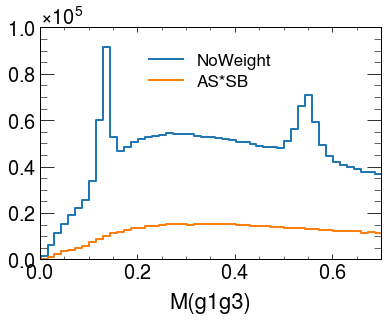

In [307]:
_=hist1d(tmp_sig["mismatchPairMass_13"],200,label="NoWeight")
_=hist1d(tmp_sig["mismatchPairMass_13"],200,tmp_sig["weightASBS"],label="AS*SB")
plt.xlim(0,0.7)
plt.ylim(0)
plt.legend()
plt.xlabel("M(g1g3)")